In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.datasets import fetch_lfw_people 
from sklearn.manifold import TSNE

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
import seaborn as sns
from time import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [0]:
_, h, w = lfw_dataset.images.shape
X1 = lfw_dataset.data
y1 = lfw_dataset.target
target_names = lfw_dataset.target_names
 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3,random_state=42)

In [6]:
cols = [ 'pixel'+str(i) for i in range(X1.shape[1]) ]
df = pd.DataFrame(X1,columns=cols)
df['y'] = y1
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (1140, 2916)


In [7]:
target_names.shape

(5,)

In [83]:
n_components = 100
pca = PCA(n_components=n_components, whiten=True,random_state=42).fit(X_train)
print('Total explained variance by principal components: {}'.format(pca.explained_variance_ratio_.sum()))

Total explained variance by principal components: 0.9245465397834778


In [0]:
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [0]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18081571 0.15304321 0.07267769]


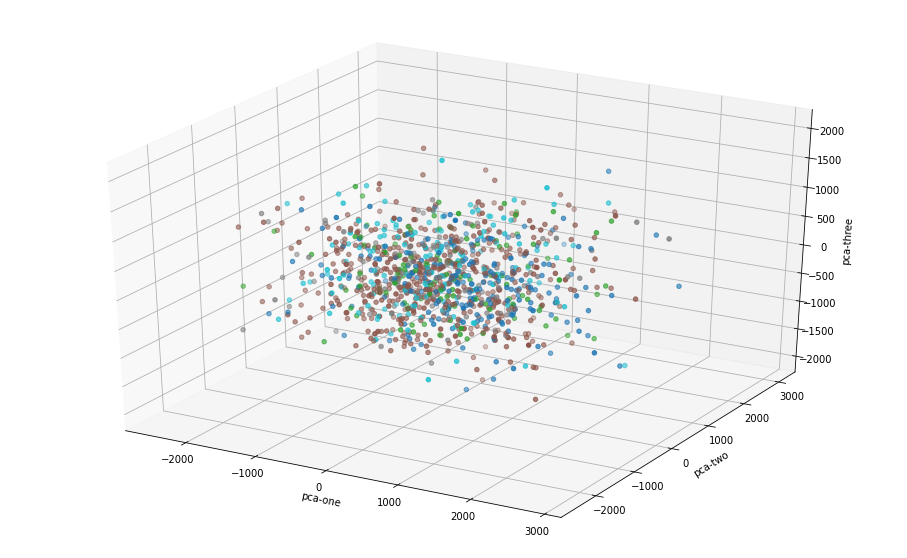

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [0]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18081589 0.15304321]


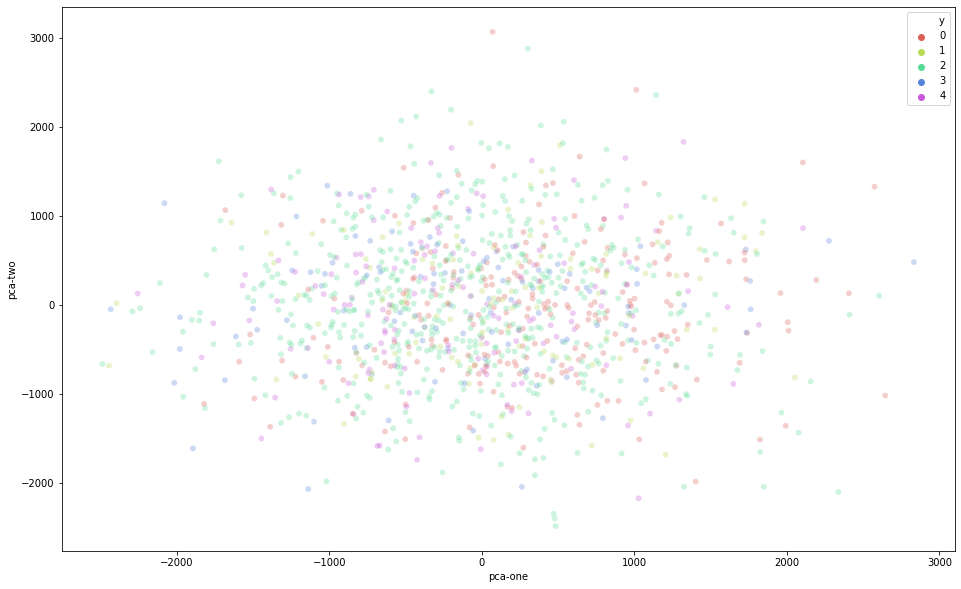

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df,
    legend="full",
    alpha=0.3
)

In [0]:
df_subset = df.copy()
data_subset = df_subset[cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18081571 0.15304317 0.07267761]


In [0]:
tsne=TSNE(n_components=2,perplexity=40,n_iter=1000).fit_transform(data_subset)

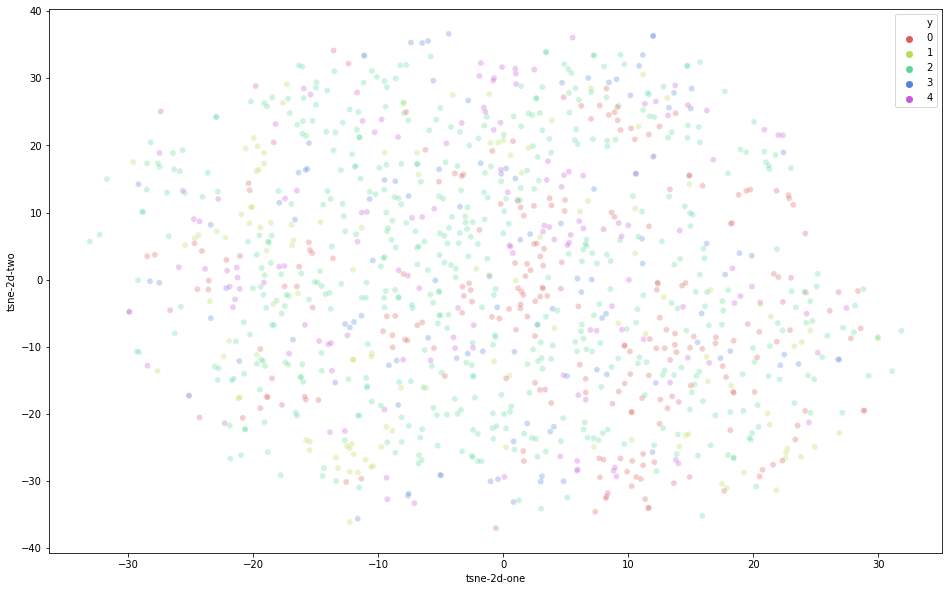

In [0]:
df_subset['tsne-2d-one'] = tsne[:,0]
df_subset['tsne-2d-two'] = tsne[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [0]:

df_s2= df.loc[df['y']<=2]

In [0]:
df_s2

In [0]:
pca_result[0]

(100,)

Q1  Task 2 

In [0]:
data_subset = df_s2[cols].values
pca = PCA(n_components=100)
pca_result = pca.fit_transform(data_subset)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.1802307  0.15899023 0.0730623  0.058298   0.05116712 0.03090165
 0.0252844  0.02196893 0.02067236 0.01825465 0.01606864 0.01435229
 0.0123146  0.01154876 0.00972918 0.00921667 0.00913657 0.00826943
 0.00799337 0.00719698 0.00683502 0.00619819 0.00602588 0.00583099
 0.00550758 0.00500583 0.00479189 0.00451381 0.00421237 0.0040203
 0.00390887 0.0037882  0.00374038 0.00361721 0.00343553 0.00337381
 0.00325839 0.00312423 0.00293974 0.00291392 0.00273787 0.00270423
 0.00266427 0.00254143 0.00250753 0.00246773 0.00236898 0.00232305
 0.00223546 0.00218963 0.00209896 0.00206012 0.00204049 0.00195427
 0.00192761 0.00188466 0.00182959 0.00175414 0.00174163 0.00172374
 0.00167123 0.00166012 0.00160388 0.00159984 0.00156399 0.00152419
 0.00148273 0.00145497 0.00143347 0.00138956 0.00136624 0.00135505
 0.0013269  0.00128713 0.00125919 0.00124328 0.00121654 0.00120192
 0.00119441 0.00118707 0.0011459  0.00110689 0.00109492 0.00107999
 0.00106521 0.0010

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


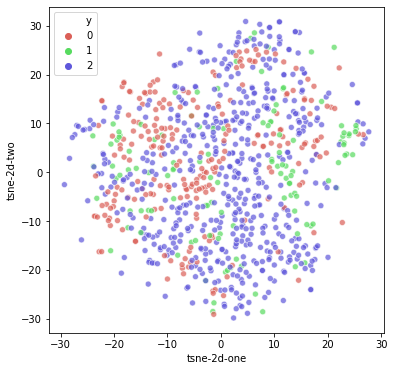

In [0]:
tsne=TSNE(n_components=2,perplexity=40,n_iter=1000).fit_transform(pca_result)
df_s2['tsne-2d-one'] = tsne[:,0]
df_s2['tsne-2d-two'] = tsne[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_s2,
    legend="full",
    alpha=0.7
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

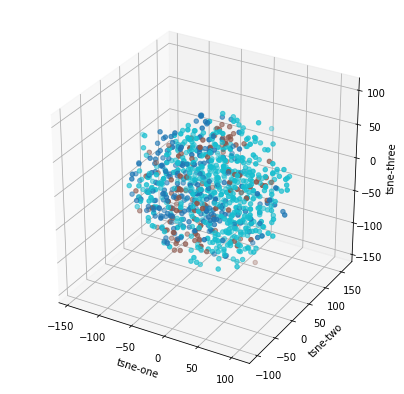

In [0]:
tsne=TSNE(n_components=3,perplexity=40,n_iter=1000).fit_transform(pca_result)
df_s2['tsne-2d-one'] = tsne[:,0]
df_s2['tsne-2d-two'] = tsne[:,1]
df_s2['tsne-2d-three'] = tsne[:,2]
ax = plt.figure(figsize=(7,7)).gca(projection='3d')
ax.scatter(
    xs=df_s2["tsne-2d-one"], 
    ys=df_s2["tsne-2d-two"], 
    zs=df_s2["tsne-2d-three"], 
    c=df_s2["y"], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

q 1 task 3


In [85]:
knn = KNeighborsClassifier(n_neighbors=1, )
knn.fit(X_pca_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(X_pca_test)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        78
           1       0.58      0.55      0.57        38
           2       0.75      0.81      0.78       159
           3       0.54      0.47      0.50        30
           4       0.40      0.49      0.44        37

    accuracy                           0.68       342
   macro avg       0.61      0.59      0.60       342
weighted avg       0.68      0.68      0.68       342



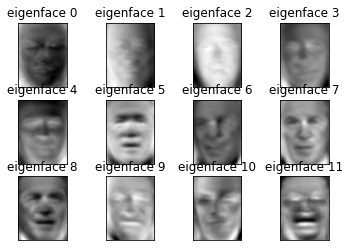

In [0]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface {0}".format(i) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

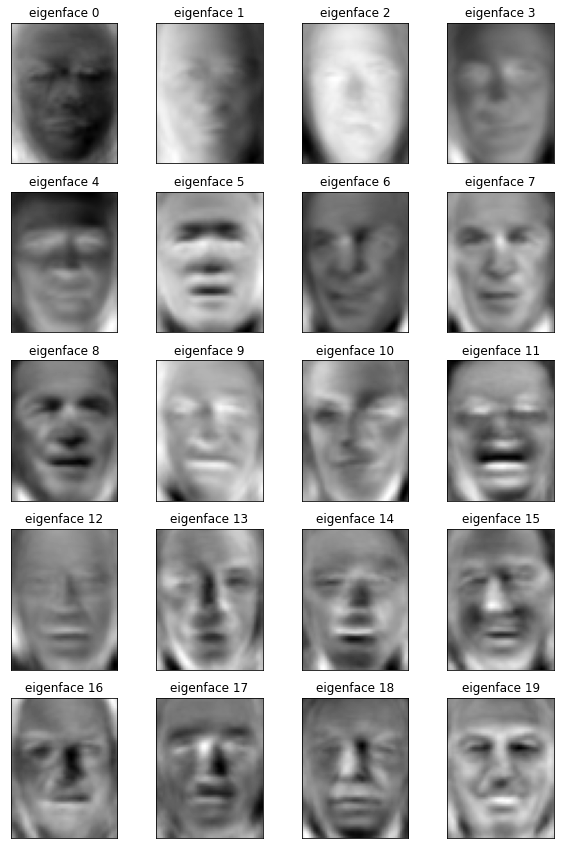

In [0]:
def plot_gallery(images, titles, h, w, rows=5, cols=4):
    plt.figure(figsize=(10,15))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface {0}".format(i) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [89]:
n_components = 32
X_full=np.concatenate((X_train,X_test))
pca = PCA(n_components=n_components, whiten=True,random_state=42).fit(X_train)
print('Total explained variance by principal components: {}'.format(pca.explained_variance_ratio_.sum()))
pca_result = pca.transform( X_train )
pca_test= pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1 )
knn.fit(pca_result, y_train)
y_pred = knn.predict(pca_test)
print(classification_report(y_test,y_pred))

Total explained variance by principal components: 0.8079198598861694
              precision    recall  f1-score   support

           0       0.66      0.73      0.70        78
           1       0.56      0.66      0.60        38
           2       0.75      0.73      0.74       159
           3       0.57      0.27      0.36        30
           4       0.50      0.57      0.53        37

    accuracy                           0.66       342
   macro avg       0.61      0.59      0.59       342
weighted avg       0.67      0.66      0.66       342



In [73]:
X_train.shape

(798, 2914)

In [74]:
pca_result.shape

(798, 32)